In [705]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams["figure.figsize"] = (15,6)
# importing dataset file
dataset = pd.read_csv("Mall_Customers.csv")

# visualizing dataset
print(dataset)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [706]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [707]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [708]:
# replacing "Male" with 0
dataset=dataset.replace("Male",0)

# replacing "Female" with 1
dataset=dataset.replace("Female",1)


# droping unnecessary column
dataset=dataset.drop(columns=['CustomerID'])

print(dataset)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2         1   20                  16                       6
3         1   23                  16                      77
4         1   31                  17                      40
..      ...  ...                 ...                     ...
195       1   35                 120                      79
196       1   45                 126                      28
197       0   32                 126                      74
198       0   32                 137                      18
199       0   30                 137                      83

[200 rows x 4 columns]


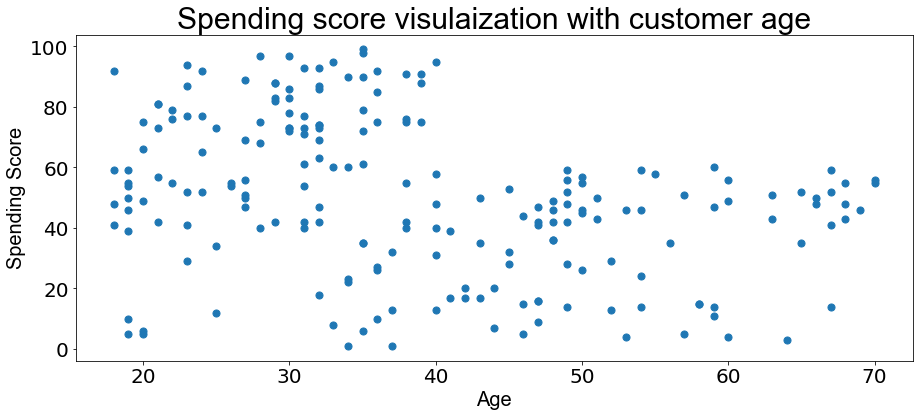

In [709]:
plt.scatter(np.array(dataset["Age"]),np.array(dataset["Spending Score (1-100)"]),s=50)
plt.title("Spending score visulaization with customer age",family="Arial",fontsize=30,color="black")
plt.xlabel("Age",family="Arial",fontsize=20,color="black")
plt.ylabel("Spending Score",family="Arial",fontsize=20,color="black")
plt.xticks(fontsize=20,color="black")
plt.yticks(fontsize=20,color="black")
plt.show()

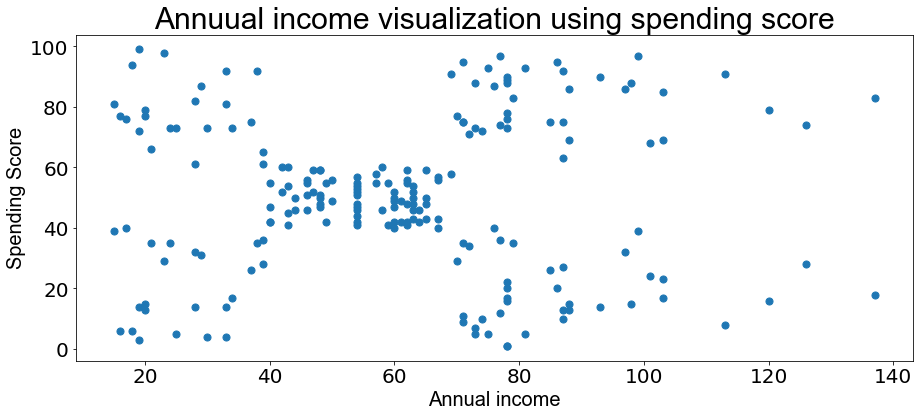

In [710]:
plt.scatter(np.array(dataset["Annual Income (k$)"]),np.array(dataset["Spending Score (1-100)"]),s=50)
plt.title("Annuual income visualization using spending score",family="Arial",fontsize=30,color="black")
plt.xlabel("Annual income",family="Arial",fontsize=20,color="black")
plt.ylabel("Spending Score",family="Arial",fontsize=20,color="black")
plt.xticks(fontsize=20,color="black")
plt.yticks(fontsize=20,color="black")
plt.show()

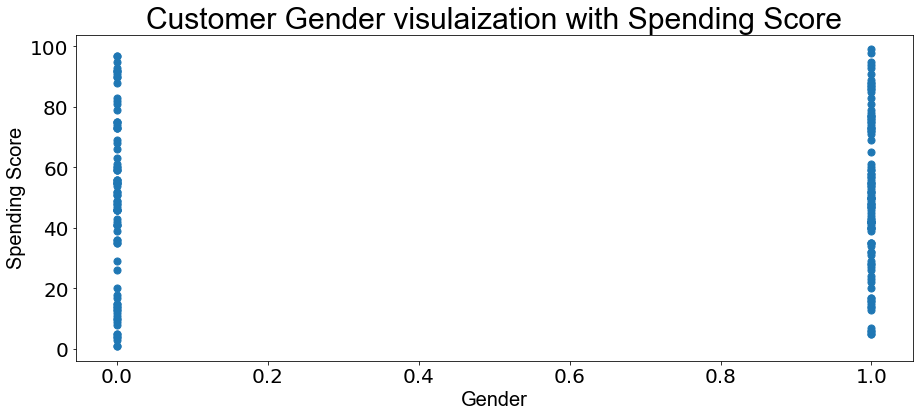

In [711]:
plt.scatter(np.array(dataset["Gender"]),np.array(dataset["Spending Score (1-100)"]),s=50)
plt.title("Customer Gender visulaization with Spending Score",family="Arial",fontsize=30,color="black")
plt.xlabel("Gender",family="Arial",fontsize=20,color="black")
plt.ylabel("Spending Score",family="Arial",fontsize=20,color="black")
plt.xticks(fontsize=20,color="black")
plt.yticks(fontsize=20,color="black")
plt.show()

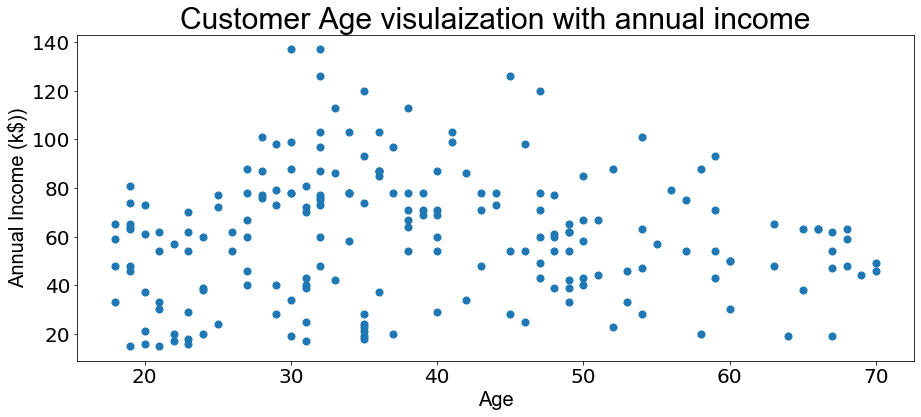

In [712]:
plt.scatter(np.array(dataset["Age"]),np.array(dataset["Annual Income (k$)"]),s=50)
plt.title("Customer Age visulaization with annual income",family="Arial",fontsize=30,color="black")
plt.xlabel("Age",family="Arial",fontsize=20,color="black")
plt.ylabel("Annual Income (k$))",family="Arial",fontsize=20,color="black")
plt.xticks(fontsize=20,color="black")
plt.yticks(fontsize=20,color="black")
plt.show()

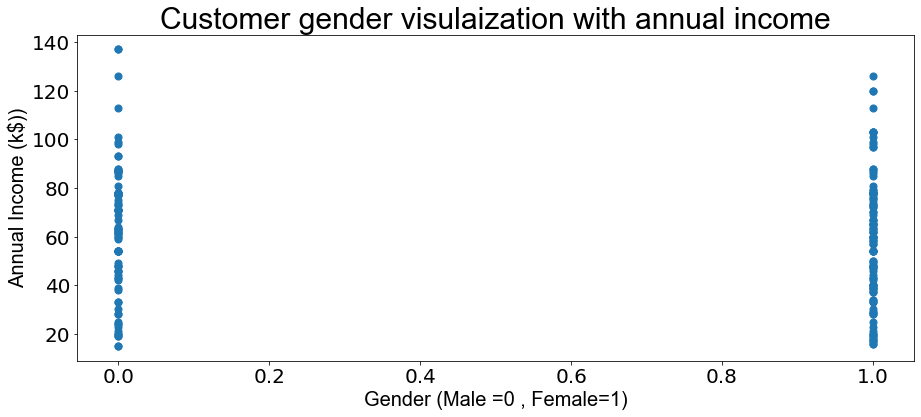

In [713]:
plt.scatter(np.array(dataset["Gender"]),np.array(dataset["Annual Income (k$)"]),s=50)
plt.title("Customer gender visulaization with annual income",family="Arial",fontsize=30,color="black")
plt.xlabel("Gender (Male =0 , Female=1)",family="Arial",fontsize=20,color="black")
plt.ylabel("Annual Income (k$))",family="Arial",fontsize=20,color="black")
plt.xticks(fontsize=20,color="black")
plt.yticks(fontsize=20,color="black")
plt.show()

In [714]:
# import KMean
from sklearn.cluster import KMeans

## Determine the optimal clusters


# i) Elbow method

In [715]:
X=dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [716]:
elbow_list=[]

for k in range(1,20):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(dataset)
    
    elbow_list.append(kmeans.inertia_)
print(elbow_list)



[308862.06000000006, 212889.44245524297, 143391.59236035682, 104414.67534220166, 75399.61541401483, 58348.64136331505, 51132.703212576904, 44355.31351771352, 40621.19205794206, 37132.84983602549, 34315.76770143968, 32397.965671647195, 30180.366296367032, 28574.77955394279, 26365.858794434836, 25203.078040466586, 23726.551104820534, 22113.88340964591, 20927.19523846467]


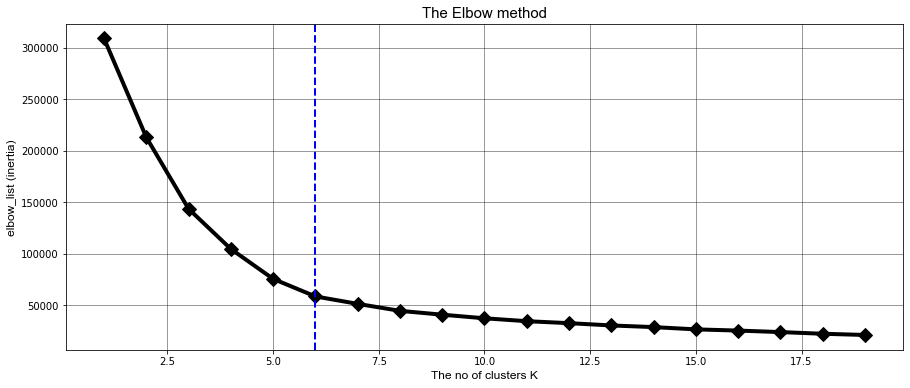

In [717]:
plt.plot(range(1,20),elbow_list,linewidth=4,color="black",marker="D",markersize=10)
plt.title("The Elbow method",family="Arial",fontsize="15",color="black")
plt.xlabel("The no of clusters K",family="Arial",fontsize="12",color="black")
plt.ylabel("elbow_list (inertia)",family="Arial",fontsize="12",color="black")
plt.xticks(fontsize=10,color="black")
plt.yticks(fontsize=10,color="black")
plt.grid(which="both",color="black",axis="x",alpha=0.5)
plt.grid(which="both",color="black",axis="y",alpha=0.5)

# after visualising plot no of optimal cluster
no_of_optimal_clusters=6

plt.axvline(x=no_of_optimal_clusters,linewidth=2,color="blue",linestyle="--")
plt.show()

## ii) Silhouette method

In [718]:
from sklearn.metrics import silhouette_score

In [719]:
Silhouette_list=[]

for k in range(2,30):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(dataset)
    
    Silhouette_list.append(silhouette_score(dataset,kmeans.labels_))
print(Silhouette_list)


[0.29307334005502633, 0.383798873822341, 0.4052954330641215, 0.4440669204743008, 0.45205475380756527, 0.44096462877395787, 0.427541566977401, 0.41494222767345024, 0.3839598287763625, 0.3697869804783315, 0.373937126095068, 0.35392587798147973, 0.3538020543568585, 0.3440299479224872, 0.339159309632942, 0.3208371923815287, 0.34414093987942596, 0.3317638165742484, 0.3373688548165132, 0.336022080331669, 0.33643801804040946, 0.3381440316811656, 0.34015214965529594, 0.3325611397088807, 0.3372105352654281, 0.3378337054251852, 0.33838145003418646, 0.345437375257585]


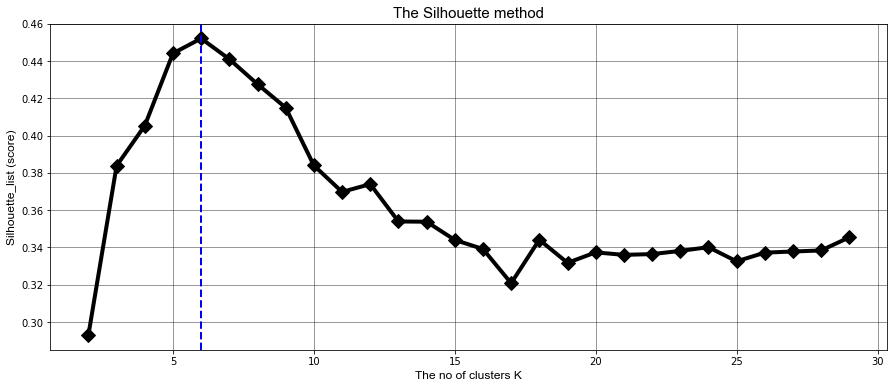

In [720]:
plt.plot(range(2,30),Silhouette_list,linewidth=4,color="black",marker="D",markersize=10)
plt.title("The Silhouette method",family="Arial",fontsize="15",color="black")
plt.xlabel("The no of clusters K",family="Arial",fontsize="12",color="black")
plt.ylabel("Silhouette_list (score)",family="Arial",fontsize="12",color="black")
plt.xticks(fontsize=10,color="black")
plt.yticks(fontsize=10,color="black")
plt.grid(which="both",color="black",axis="x",alpha=0.5)
plt.grid(which="both",color="black",axis="y",alpha=0.5)

# after visualising plot no of optimal cluster
no_of_optimal_clusters=6

plt.axvline(x=no_of_optimal_clusters,linewidth=2,color="blue",linestyle="--")
plt.show()

## reducing 4 dimension features into 2 dimension uning PCA

           PC1        PC2
0   -31.869945 -33.001252
1     0.764494 -56.842901
2   -57.408276 -13.124961
3    -2.168543 -53.478590
4   -32.174085 -30.388412
..         ...        ...
195  58.352515  31.017542
196  19.908001  66.446108
197  58.520804  38.346039
198  20.979130  79.376405
199  72.447693  41.811336

[200 rows x 2 columns]


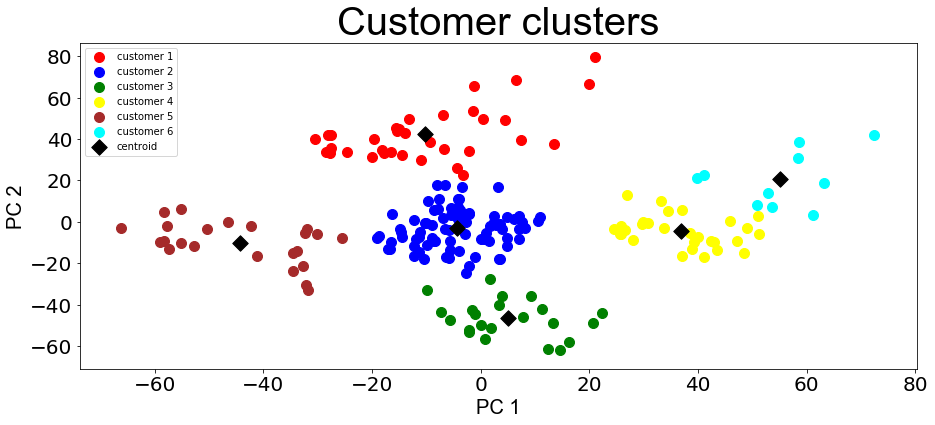

In [721]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

reduced_dataset = pd.DataFrame(pca.fit_transform(dataset), columns=['PC1', 'PC2'])
print(reduced_dataset)

reduced_dataset_array=np.array(reduced_dataset)
kmeans=KMeans(n_clusters=no_of_optimal_clusters,random_state=42)
y_kmeans=kmeans.fit_predict(reduced_dataset_array)


plt.scatter(reduced_dataset_array[y_kmeans==0,0],reduced_dataset_array[y_kmeans==0,1],s=100,c='red',label='customer 1')
plt.scatter(reduced_dataset_array[y_kmeans==1,0],reduced_dataset_array[y_kmeans==1,1],s=100,c='blue',label='customer 2')
plt.scatter(reduced_dataset_array[y_kmeans==2,0],reduced_dataset_array[y_kmeans==2,1],s=100,c='green',label='customer 3')
plt.scatter(reduced_dataset_array[y_kmeans==3,0],reduced_dataset_array[y_kmeans==3,1],s=100,c='yellow',label='customer 4')
plt.scatter(reduced_dataset_array[y_kmeans==4,0],reduced_dataset_array[y_kmeans==4,1],s=100,c='brown',label='customer 5')
plt.scatter(reduced_dataset_array[y_kmeans==5,0],reduced_dataset_array[y_kmeans==5,1],s=100,c='cyan',label='customer 6')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black",marker="D",s=120,label="centroid")

plt.title("Customer clusters",family="Arial",fontsize=40,color="black")
plt.xlabel("PC 1",family="Arial",fontsize=20,color="black")
plt.ylabel("PC 2",family="Arial",fontsize=20,color="black")
plt.xticks(fontsize=20,color="black")
plt.yticks(fontsize=20,color="black")
plt.legend()

plt.show()
